In [1]:
!pip install --upgrade --no-cache-dir gdown

  Obtaining dependency information for gdown from https://files.pythonhosted.org/packages/54/70/e07c381e6488a77094f04c85c9caf1c8008cdc30778f7019bc52e5285ef0/gdown-5.2.0-py3-none-any.whl.metadata


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
import re
import os
import seaborn as sns


In [3]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [4]:
import gdown

url='https://drive.google.com/file/d/1CJOMYyg64x3gN52p6OqypN6UUgDnUhkm/view?usp=sharing'

ider=url.split('/')[-2]
!gdown --id $ider

D:\Subhrajit\anaconda3\lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1CJOMYyg64x3gN52p6OqypN6UUgDnUhkm
From (redirected): https://drive.google.com/uc?id=1CJOMYyg64x3gN52p6OqypN6UUgDnUhkm&confirm=t&uuid=39d4406a-4386-49ed-8ace-744df56fde58
To: C:\Users\PREDATOR\Scaler\Unsupervised and RecSys\new_train.csv

  0%|          | 0.00/425M [00:00<?, ?B/s]
  0%|          | 524k/425M [00:00<01:40, 4.21MB/s]
  0%|          | 2.10M/425M [00:00<00:43, 9.68MB/s]
  1%|          | 4.19M/425M [00:00<00:29, 14.3MB/s]
  2%|1         | 7.86M/425M [00:00<00:19, 21.5MB/s]
  2%|2         | 10.5M/425M [00:00<00:22, 18.1MB/s]
  3%|2         | 12.6M/425M [00:00<00:32, 12.8MB/s]
  3%|3         | 14.2M/425M [00:01<00:40, 10.2MB/s]
  4%|3         | 15.7M/425M [00:01<00:52, 7.79MB/s]
  4%|4         | 17

In [5]:
train = pd.read_csv('new_train.csv')


In [6]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.britanica.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.britanica.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.britanica.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.britanica.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.britanica.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [8]:
train.shape

(145063, 551)

In [9]:
len(train)

145063

## Ploting NULL values

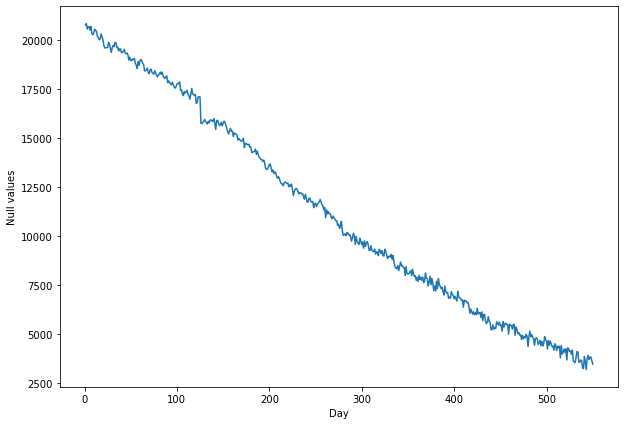

In [10]:
days = [r for r in range(1, len(train.columns))]
plot.figure(figsize=(10,7))
plot.xlabel('Day')
plot.ylabel('Null values')
plot.plot(days, train.isnull().sum()[1:])

**ANALYSIS** <br>
The number of NULL values is decreasing which might be due to the fact that some of the websites were created after that time

In [11]:
print(train.shape)
train=train.dropna(how='all')
#‘all’ : If all values are NA, drop that row or column.
print(train.shape)

train=train.dropna(thresh=300)
print(train.shape)

(145063, 551)
(145063, 551)
(133617, 551)


We are dropping websites which are more than 300 days (i.e 10 months) as NULL as these websites wont be making much sense in our analysis

In [12]:
# 0 indicating there is no traffic in the website
train=train.fillna(0)
train.tail()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
145012,Legión_(Marvel_Comics)_es.britanica.org_all-ac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,3.0,2.0,4.0,2.0,4.0,4.0,1.0,2.0,2.0
145013,Referéndum_sobre_la_permanencia_del_Reino_Unid...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,16.0,8.0,3.0,6.0,3.0,3.0,10.0,11.0,3.0
145014,Salida_del_Reino_Unido_de_la_Unión_Europea_es....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,36.0,23.0,182.0,43.0,8.0,22.0,13.0,18.0,14.0
145015,"Amar,_después_de_amar_es.britanica.org_all-acc...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,30.0,27.0,14.0,8.0,7.0,5.0,43.0,12.0,25.0
145016,Anexo:89.º_Premios_Óscar_es.britanica.org_all-...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## Extracting Title, Language, Access_type, Access_origin from Page column

In [13]:
#Usage of Regex
def split_page(page):
    w = re.split('_|\.', page)
    print(w)
    return ' '.join(w[:-5]), w[-5], w[-2], w[-1]

split_page('2NE1_zh.britanica.org_all-access_spider')

['2NE1', 'zh', 'britanica', 'org', 'all-access', 'spider']


('2NE1', 'zh', 'all-access', 'spider')

In [14]:
def split_page(page):
  w = re.split('_|\.', page)
  return ' '.join(w[:-5]), w[-5], w[-2], w[-1]

li = list(train['Page'].apply(lambda x: split_page(str(x))))
df = pd.DataFrame(li)
df.columns = ['Title', 'Language', 'Access_type','Access_origin']
df = pd.concat([train, df], axis = 1)

In [15]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Language,Access_type,Access_origin
0,2NE1_zh.britanica.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,zh,all-access,spider
1,2PM_zh.britanica.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,zh,all-access,spider
2,3C_zh.britanica.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,zh,all-access,spider
3,4minute_zh.britanica.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,zh,all-access,spider
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5566,zh,all-access,spider


<AxesSubplot:xlabel='Language', ylabel='count'>

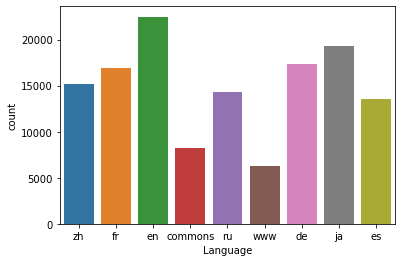

In [16]:
sns.countplot(df['Language'])

**ANALYSIS** <br>
{'ja':'Japanese', 'de':'German', 'en' : 'English', 'no_lang':'Media_File', 'fr':'French', 'zh':'Chinese', 'ru':'Russian', 'es':'Spanish'}

- English has the highest count followed by Japanese, German , French and so on

<AxesSubplot:xlabel='Access_type', ylabel='count'>

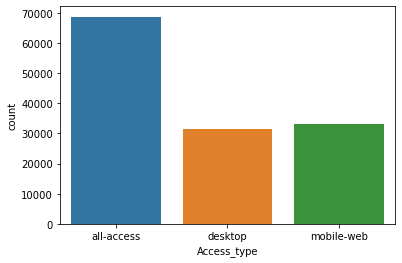

In [17]:
sns.countplot(df['Access_type'])

**ANALYSIS** <br>

- All-access has the highest count followed by mobile-web and desktop

<AxesSubplot:xlabel='Access_origin', ylabel='count'>

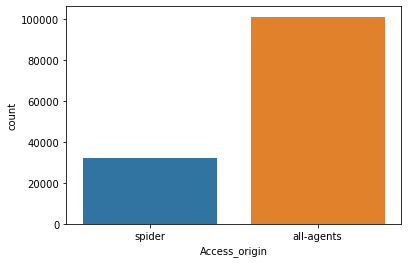

In [18]:
sns.countplot(df['Access_origin'])

**ANALYSIS** <br>

- All-agents has the highest count i.e organic view is far more than that of spiders or bots

In [19]:
#here we see that the languages are not treated properly as there are commons and www
df.groupby('Language').count()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Access_type,Access_origin
Language,,,,,,,,,,,,,,,,,,,,,
commons,7672,7672,7672,7672,7672,7672,7672,7672,7672,7672,...,7672,7672,7672,7672,7672,7672,7672,8266,8266,8266
de,15946,15946,15946,15946,15946,15946,15946,15946,15946,15946,...,15946,15946,15946,15946,15946,15946,15946,17362,17362,17362
en,20758,20758,20758,20758,20758,20758,20758,20758,20758,20758,...,20758,20758,20758,20758,20758,20758,20758,22486,22486,22486
es,12268,12268,12268,12268,12268,12268,12268,12268,12268,12268,...,12268,12268,12268,12268,12268,12268,12268,13551,13551,13551
fr,15418,15418,15418,15418,15418,15418,15418,15418,15418,15418,...,15418,15418,15418,15418,15418,15418,15418,16948,16948,16948
ja,17132,17132,17132,17132,17132,17132,17132,17132,17132,17132,...,17132,17132,17132,17132,17132,17132,17132,19295,19295,19295
ru,12955,12955,12955,12955,12955,12955,12955,12955,12955,12955,...,12955,12955,12955,12955,12955,12955,12955,14270,14270,14270
www,5743,5743,5743,5743,5743,5743,5743,5743,5743,5743,...,5743,5743,5743,5743,5743,5743,5743,6228,6228,6228
zh,14845,14845,14845,14845,14845,14845,14845,14845,14845,14845,...,14845,14845,14845,14845,14845,14845,14845,15211,15211,15211


In [20]:
df[df['Language']=='commons']

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Language,Access_type,Access_origin
12271,Burning_Man_en.britanica.org_desktop_all-agents,1693.0,1490.0,1186.0,1099.0,1051.0,1968.0,1874.0,1637.0,1842.0,...,940.0,2976.0,2447.0,1648.0,1282.0,956.0,Accueil,commons,all-access,spider
12272,Cali_Cartel_en.britanica.org_desktop_all-agents,348.0,363.0,214.0,252.0,257.0,320.0,340.0,345.0,432.0,...,1197.0,1449.0,1376.0,1350.0,1287.0,992.0,Atlas of Asia,commons,all-access,spider
12273,Call_of_Duty:_Modern_Warfare_2_en.britanica.or...,806.0,768.0,700.0,725.0,723.0,823.0,849.0,731.0,833.0,...,818.0,929.0,892.0,878.0,893.0,712.0,Atlas of Europe,commons,all-access,spider
12274,Calvin_Harris_en.britanica.org_desktop_all-agents,7114.0,5599.0,7685.0,15844.0,9390.0,7173.0,5499.0,6367.0,5630.0,...,1242.0,1409.0,1714.0,1604.0,1602.0,1300.0,Atlas of World War II,commons,all-access,spider
12275,Carl_Sagan_en.britanica.org_desktop_all-agents,1808.0,1759.0,1838.0,1631.0,1701.0,2230.0,2052.0,2065.0,2002.0,...,1425.0,1730.0,1858.0,1781.0,1718.0,1345.0,Atlas of colonialism,commons,all-access,spider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75274,Ash_Wednesday_en.britanica.org_mobile-web_all-...,170.0,169.0,165.0,166.0,186.0,154.0,154.0,184.0,173.0,...,475.0,444.0,389.0,382.0,362.0,393.0,"File:El jardín de las Delicias, de El Bosco jpg",commons,desktop,all-agents
75275,Ashley_Williams_(footballer)_en.britanica.org_...,112.0,102.0,135.0,147.0,120.0,89.0,90.0,109.0,215.0,...,348.0,439.0,357.0,267.0,639.0,429.0,File:Jää on kulmunud pallideks (Looduse veidru...,commons,desktop,all-agents
75276,Assassin's_Creed_(film)_en.britanica.org_mobil...,28.0,15.0,24.0,24.0,27.0,34.0,36.0,35.0,22.0,...,43471.0,41147.0,38978.0,36517.0,41760.0,38116.0,File:Reichstagsgebäude mit Weihnachtsbaum bei ...,commons,desktop,all-agents
75277,Aubrey_Plaza_en.britanica.org_mobile-web_all-a...,3067.0,2952.0,3459.0,3310.0,3294.0,3885.0,3830.0,3325.0,3150.0,...,4004.0,4848.0,5125.0,4907.0,4617.0,4415.0,Category:Images by Eugène Cattin,commons,desktop,all-agents


In [21]:
# Checking another way of fetching the language out of the string
def lang(Page):
    val = re.search('[a-z][a-z].britanica.org',Page)
    if val:
        #print(val)
        #print(val[0][0:2] )

        return val[0][0:2]

    return 'no_lang'

In [22]:
lang('Cali_Cartel_en.britanica.org_desktop_all-agents')

'en'

In [23]:


df['Language']=df['Page'].apply(lambda x: lang(str(x)))

In [24]:
df.groupby('Language').count() #now the count has increased. You can go back and get it sorted

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Access_type,Access_origin
Language,,,,,,,,,,,,,,,,,,,,,
de,17362,17362,17362,17362,17362,17362,17362,17362,17362,17362,...,17362,17362,17362,17362,17362,17362,17362,13046,13046,13046
en,22486,22486,22486,22486,22486,22486,22486,22486,22486,22486,...,22486,22486,22486,22486,22486,22486,22486,22486,22486,22486
es,13551,13551,13551,13551,13551,13551,13551,13551,13551,13551,...,13551,13551,13551,13551,13551,13551,13551,10142,10142,10142
fr,16948,16948,16948,16948,16948,16948,16948,16948,16948,16948,...,16948,16948,16948,16948,16948,16948,16948,16948,16948,16948
ja,19295,19295,19295,19295,19295,19295,19295,19295,19295,19295,...,19295,19295,19295,19295,19295,19295,19295,16140,16140,16140
no_lang,14494,14494,14494,14494,14494,14494,14494,14494,14494,14494,...,14494,14494,14494,14494,14494,14494,14494,25374,25374,25374
ru,14270,14270,14270,14270,14270,14270,14270,14270,14270,14270,...,14270,14270,14270,14270,14270,14270,14270,14270,14270,14270
zh,15211,15211,15211,15211,15211,15211,15211,15211,15211,15211,...,15211,15211,15211,15211,15211,15211,15211,15211,15211,15211


In [25]:
df_language=df.groupby('Language').mean().transpose()
df_language

Language,de,en,es,fr,ja,no_lang,ru,zh
2015-07-01,763.765926,3767.328604,1127.485204,499.092872,614.637160,102.733545,663.199229,272.498521
2015-07-02,753.362861,3755.158765,1077.485425,502.297852,705.813216,107.663447,674.677015,272.906778
2015-07-03,723.074415,3565.225696,990.895949,483.007553,637.451671,101.769629,625.329783,271.097167
2015-07-04,663.537323,3711.782932,930.303151,516.275785,800.897435,86.853871,588.171829,273.712379
2015-07-05,771.358657,3833.433025,1011.759575,506.871666,768.352319,96.254105,626.385354,291.977713
...,...,...,...,...,...,...,...,...
2016-12-27,1119.596936,6314.335275,1070.923400,840.590217,808.541436,155.270181,998.374071,363.066991
2016-12-28,1062.284069,6108.874144,1108.996753,783.585379,807.430163,178.561267,945.054730,369.049701
2016-12-29,1033.939062,6518.058525,1058.660320,763.209169,883.752786,150.873534,909.352207,340.526330
2016-12-30,981.786430,5401.792360,807.551177,710.502773,979.278777,156.049193,815.475123,342.745316


In [26]:
df_language.reset_index(inplace=True)
df_language.set_index('index', inplace=True)

In [27]:
df_language

Language,de,en,es,fr,ja,no_lang,ru,zh
index,,,,,,,,
2015-07-01,763.765926,3767.328604,1127.485204,499.092872,614.637160,102.733545,663.199229,272.498521
2015-07-02,753.362861,3755.158765,1077.485425,502.297852,705.813216,107.663447,674.677015,272.906778
2015-07-03,723.074415,3565.225696,990.895949,483.007553,637.451671,101.769629,625.329783,271.097167
2015-07-04,663.537323,3711.782932,930.303151,516.275785,800.897435,86.853871,588.171829,273.712379
2015-07-05,771.358657,3833.433025,1011.759575,506.871666,768.352319,96.254105,626.385354,291.977713
...,...,...,...,...,...,...,...,...
2016-12-27,1119.596936,6314.335275,1070.923400,840.590217,808.541436,155.270181,998.374071,363.066991
2016-12-28,1062.284069,6108.874144,1108.996753,783.585379,807.430163,178.561267,945.054730,369.049701
2016-12-29,1033.939062,6518.058525,1058.660320,763.209169,883.752786,150.873534,909.352207,340.526330


Text(0, 0.5, 'Views per Page')

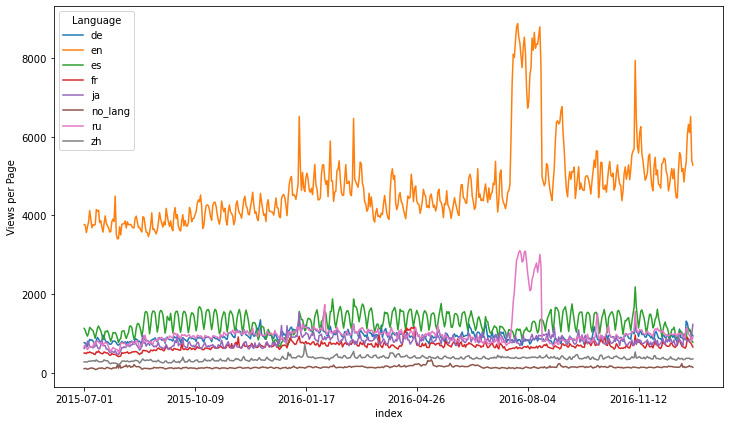

In [28]:
df_language.plot(figsize=(12,7))
plot.ylabel('Views per Page')

Ploting the data shows that articles in english get the most number of views as compared to different languages, there are some spikes at different times in different laguages

Text(0, 0.5, 'Views per Page')

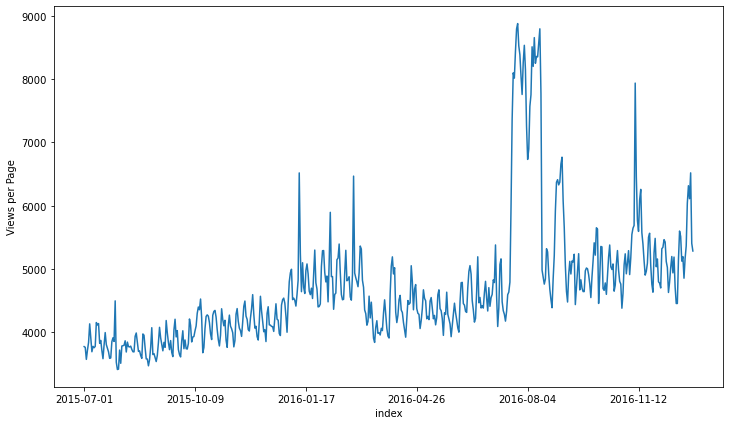

In [29]:
df_language['en'].plot(figsize=(12,7))
plot.ylabel('Views per Page')

In [30]:
total_view=df_language.copy()

## Check if time series is Stationary/Non-stationary

**NULL Hypothesis:** Time Series is Non-Stationary <br>
**ALTERNATE Hypothesis:**  Time Series is Stationary

In [31]:
from statsmodels.tsa.stattools import adfuller
def df_test(x):
    result=adfuller(x)
    # print('ADF Stastistic: %f'%result[0])
    # print('p-value: %f'%result[1])
    p_value=result[1]
    return p_value

p_value=df_test(total_view['en'])

if p_value<0.05:
  print(p_value)
  print("Time Series is Stationary")
else:
  print(p_value)
  print("Time Series is Non-Stationary")

0.14933749437355304
Time Series is Non-Stationary


## Converting to Stationary Time Series


### Decomposition

In [32]:
ts=total_view['en']

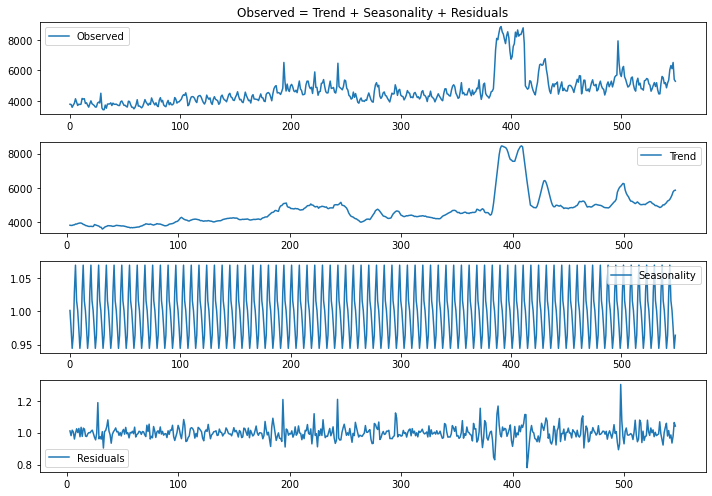

In [33]:
# Naive decomposition of our Time Series as explained above
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts.values, model='multiplicative',period = 7)

""" Additive or multiplicative?
  It’s important to understand what the difference between a multiplicative time series and an additive one before we go any further.

  There are three components to a time series:
  – trend how things are overall changing
  – seasonality how things change within a given period e.g. a year, month, week, day
  – error/residual/irregular activity not explained by the trend or the seasonal value

  How these three components interact determines the difference between a multiplicative and an additive time series.

  In a multiplicative time series, the components multiply together to make the time series. If you have an increasing trend, the amplitude of seasonal activity increases. Everything becomes more exaggerated. This is common when you’re looking at web traffic.

  In an additive time series, the components add together to make the time series. If you have an increasing trend, you still see roughly the same size peaks and troughs throughout the time series. This is often seen in indexed time series where the absolute value is growing but changes stay relative.


"""

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plot.figure(figsize=(10,7))
plot.subplot(411)
plot.title('Observed = Trend + Seasonality + Residuals')
plot.plot(ts.values,label='Observed')
plot.legend(loc='best')
plot.subplot(412)
plot.plot(trend, label='Trend')
plot.legend(loc='best')
plot.subplot(413)
plot.plot(seasonal,label='Seasonality')
plot.legend(loc='best')
plot.subplot(414)
plot.plot(residual, label='Residuals')
plot.legend(loc='best')
plot.tight_layout()
plot.show()

In [34]:
ts_decompose=pd.DataFrame(residual).fillna(0)[0].values
df_test(ts_decompose)

0.002945192049032519

Time series is now stationary

### Differenciating

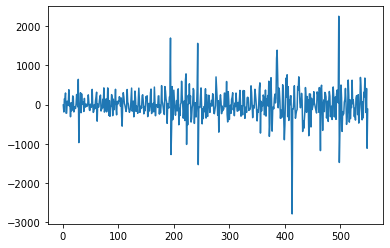

In [35]:
ts_diff = ts - ts.shift(1)
plot.plot(ts_diff.values)
plot.show()

In [36]:
ts_diff.dropna(inplace=True)
df_test(ts_diff)

4.721271966433165e-13

Time series is now stationary

## Plot the autocorreltaion and partial auto correlation functions

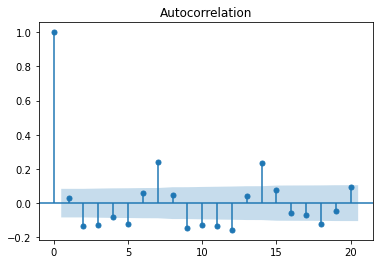

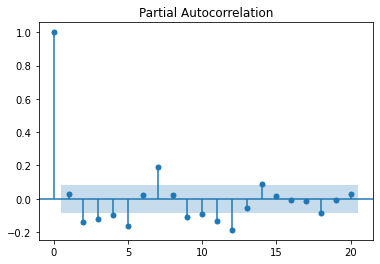

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf=plot_acf(ts_diff,lags=20)
pacf=plot_pacf(ts_diff,lags=20)

# ARIMA Model

In [38]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

In [39]:
import statsmodels.api as sm

In [40]:
ts

index
2015-07-01    3767.328604
2015-07-02    3755.158765
2015-07-03    3565.225696
2015-07-04    3711.782932
2015-07-05    3833.433025
                 ...     
2016-12-27    6314.335275
2016-12-28    6108.874144
2016-12-29    6518.058525
2016-12-30    5401.792360
2016-12-31    5280.643467
Name: en, Length: 550, dtype: float64

In [41]:
train = ts[:-20]
test = ts[-20:]

In [42]:
train

index
2015-07-01    3767.328604
2015-07-02    3755.158765
2015-07-03    3565.225696
2015-07-04    3711.782932
2015-07-05    3833.433025
                 ...     
2016-12-07    5114.482745
2016-12-08    5021.173130
2016-12-09    4624.299475
2016-12-10    4786.770924
2016-12-11    5013.644668
Name: en, Length: 530, dtype: float64

In [43]:
test

index
2016-12-12    5193.673219
2016-12-13    4934.576981
2016-12-14    5185.052477
2016-12-15    4711.162323
2016-12-16    4449.926665
2016-12-17    4449.799698
2016-12-18    5141.560082
2016-12-19    5596.838566
2016-12-20    5511.269812
2016-12-21    5120.664413
2016-12-22    5191.453438
2016-12-23    4850.360002
2016-12-24    5162.438451
2016-12-25    5360.667704
2016-12-26    6036.850129
2016-12-27    6314.335275
2016-12-28    6108.874144
2016-12-29    6518.058525
2016-12-30    5401.792360
2016-12-31    5280.643467
Name: en, dtype: float64

In [44]:
#model = ARIMA(train, order=(4, 1, 3))
model = sm.tsa.arima.ARIMA(train, order=(4, 1, 3))
fitted = model.fit()

# Forecast
fc = fitted.forecast(20, alpha=0.02)

D:\Subhrajit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Subhrajit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Subhrajit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Subhrajit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
fc

2016-12-12    5126.166791
2016-12-13    5065.083154
2016-12-14    4873.101904
2016-12-15    4696.240030
2016-12-16    4666.382584
2016-12-17    4807.285471
2016-12-18    5011.580184
2016-12-19    5126.688739
2016-12-20    5064.682327
2016-12-21    4873.498225
2016-12-22    4695.863664
2016-12-23    4666.769723
2016-12-24    4806.899820
2016-12-25    5011.949820
2016-12-26    5126.304631
2016-12-27    5065.057463
2016-12-28    4873.133274
2016-12-29    4696.243425
2016-12-30    4666.405068
2016-12-31    4807.261718
Freq: D, Name: predicted_mean, dtype: float64

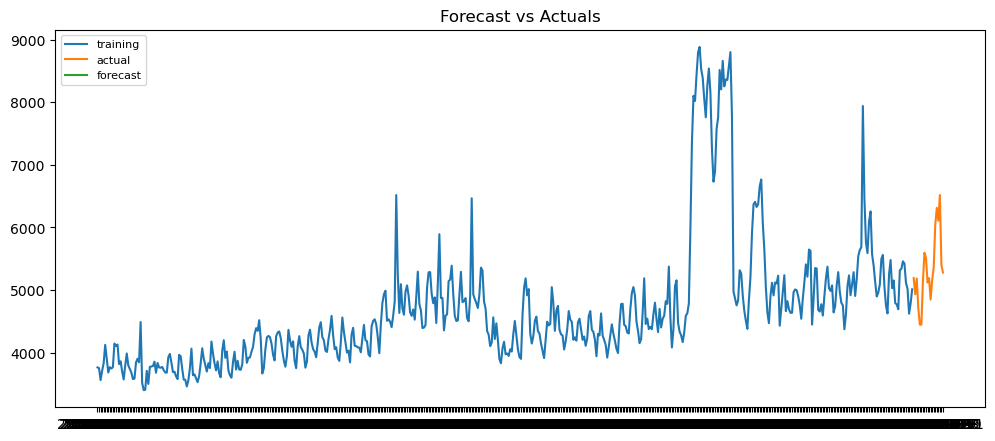

In [46]:
fc_series = pd.Series(fc, index=test.index)
# Plot
plot.figure(figsize=(12,5), dpi=100)
plot.plot(train, label='training')
plot.plot(test, label='actual')
plot.plot(fc_series, label='forecast')

plot.title('Forecast vs Actuals')
plot.legend(loc='upper left', fontsize=8)

In [47]:
mape = np.mean(np.abs(fc - test.values)/np.abs(test.values))
rmse = np.mean((fc - test.values)**2)**.5
print("mape:",mape)
print("rsme:",rmse)

mape: 0.08969122280773775
rsme: 682.6531459449876


## SARIMAX

In [48]:
!gdown 1H9054-eVP9IdANPOblXwX7Nd2r_Sjf1u
ex_df = pd.read_csv('Exog_Campaign_eng')
ex_df.head()
exog=ex_df['Exog'].to_numpy()

Downloading...
From: https://drive.google.com/uc?id=1H9054-eVP9IdANPOblXwX7Nd2r_Sjf1u
To: C:\Users\PREDATOR\Scaler\Unsupervised and RecSys\Exog_Campaign_eng

  0%|          | 0.00/1.10k [00:00<?, ?B/s]
100%|##########| 1.10k/1.10k [00:00<00:00, 1.11MB/s]


D:\Subhrajit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Subhrajit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Subhrajit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


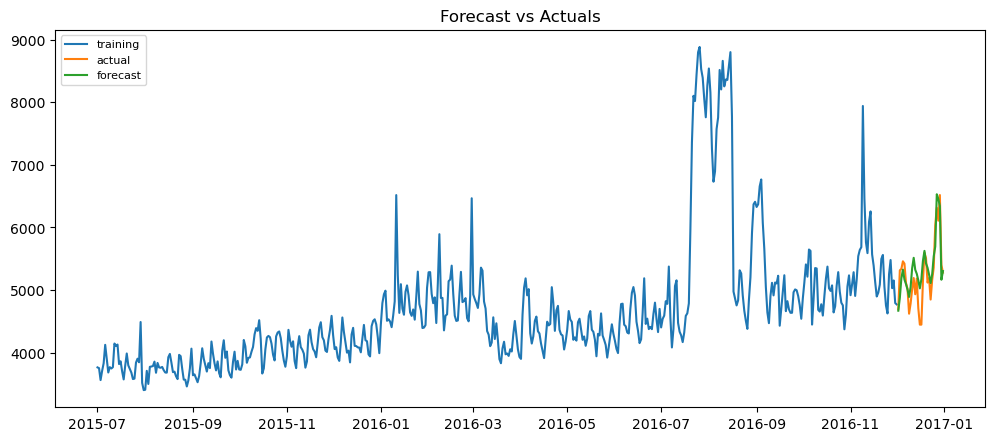

In [49]:
import statsmodels.api as sm
train=ts[:520]
test=ts[520:]
model=sm.tsa.statespace.SARIMAX(train,order=(4, 1, 3),seasonal_order=(1,1,1,7),exog=exog[:520])
results=model.fit()

fc=results.forecast(30,dynamic=True,exog=pd.DataFrame(exog[520:]))

# Make as pandas series
fc_series = pd.Series(fc)
# Plot
train.index=train.index.astype('datetime64[ns]')
test.index=test.index.astype('datetime64[ns]')
plot.figure(figsize=(12,5), dpi=100)
plot.plot(train, label='training')
plot.plot(test, label='actual')
plot.plot(fc_series, label='forecast')

plot.title('Forecast vs Actuals')
plot.legend(loc='upper left', fontsize=8)

In [50]:
mape = np.mean(np.abs(fc - test.values)/np.abs(test.values))
rmse = np.mean((fc - test.values)**2)**.5
print("mape:",mape)
print("rsme:",rmse)

mape: 0.04618225719226569
rsme: 290.41325908001744


SARIMA Better than ARIMA